# LMRD - Exploratory Data Analysis

## Imports

In [3]:
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

sns.set()

## Input data

In [5]:
!wget -P ../../data https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

with tarfile.open('../../data/aclImdb_v1.tar.gz') as tar:
    tar.extractall(path="../../data")

--2020-02-12 13:51:57--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘../data/aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  4.52MB/s    in 35s     

2020-02-12 13:52:33 (2.28 MB/s) - ‘../data/aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [13]:
import glob

def get_data_by_folder(folder):
    text = []
    label = []
    for i in glob.glob('../data/aclImdb/'+ folder + '/pos/*.txt'):
        with open(i) as f:
            text.append(f.read())
            label.append(1)

    for i in glob.glob('../data/aclImdb/' + folder + '/neg/*.txt'):
        with open(i) as f:
            text.append(f.read())
            label.append(0)
    df = pd.DataFrame({'text': text, 'label': label})
    return df

def get_data():
    train = get_data_by_folder('train')
    test = get_data_by_folder('test')
    return train[['text']], train['label'], test[['text']], test['label']

In [14]:
x_train, y_train, x_test, y_test = get_data()

## Explore data

In [15]:
print(f'Train shape: {x_train.shape[0]}')
print(f'Test  shape: {x_test.shape[0]}')

Train shape: 25000
Test  shape: 25000


In [16]:
x_train.head()

,text
0,Deranged and graphically gory Japanese film ab...
1,This series was a cut above the rest of the TV...
2,This film is a very good movie.The way how the...
3,Wasn't sure what to expect from this movie con...
4,"Narratives  whether written, visual or poetic..."


In [17]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [18]:
y_train.nunique()

2

In [25]:
y_test.nunique()

2

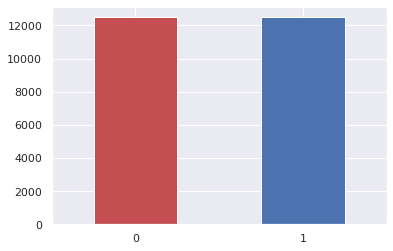

In [24]:
y_train.value_counts().sort_index().plot(kind='bar', color=['r', 'b']);
plt.xticks(rotation='horizontal');

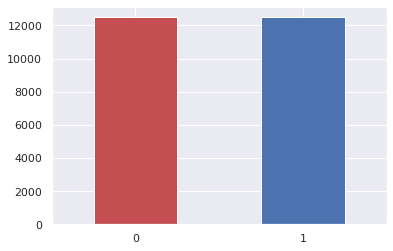

In [28]:
y_test.value_counts().sort_index().plot(kind='bar', color=['r', 'b']);
plt.xticks(rotation='horizontal');

Os rótulos estão balanceados

### Analisando a quantidade de caracteres das sentenças:

In [29]:
x_train['len'] = x_train['text'].apply(len)
x_test['len'] = x_test['text'].apply(len)

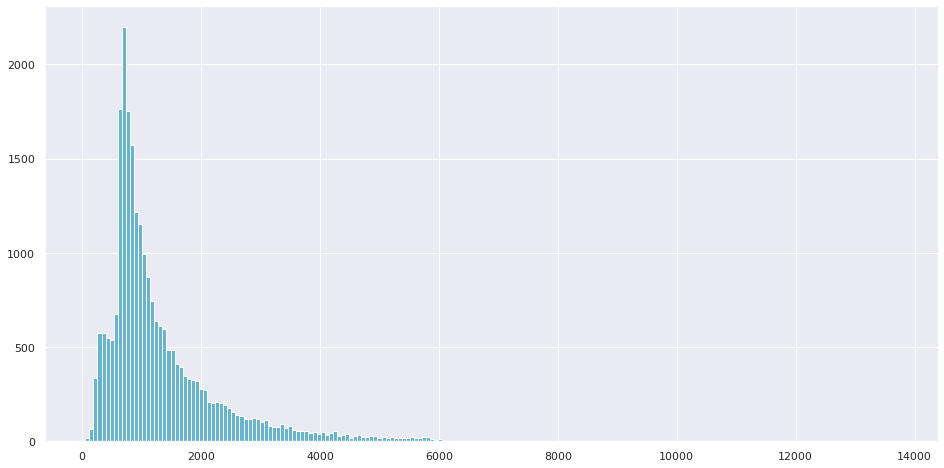

In [30]:
x_train['len'].hist(bins=200, figsize=(16, 8), color='c');

In [31]:
(x_train['len'] > 6000).sum()

43

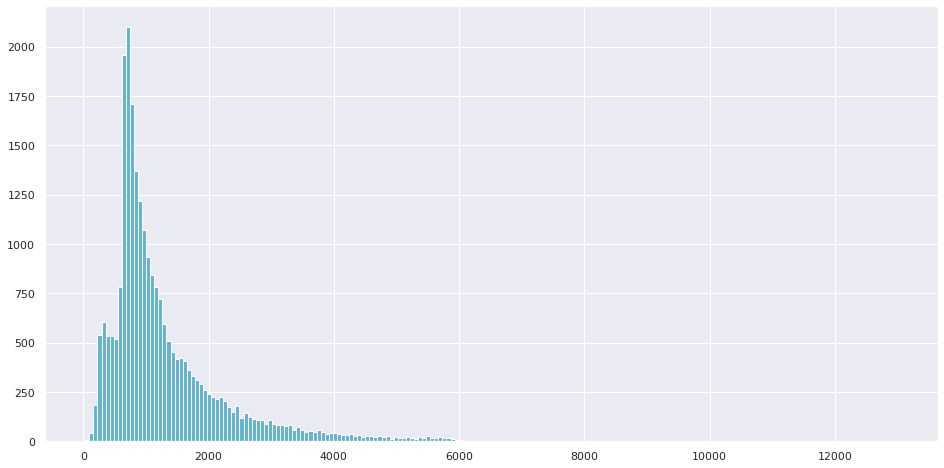

In [32]:
x_test['len'].hist(bins=200, figsize=(16, 8), color='c');

In [33]:
(x_test['len'] > 6000).sum()

26

A distribuição da quantidade de caracteres das setenças é inclinada a esquerda, tendo a maior parte do texto até 2000 caracteres, porém há a presença de sentenças maiores acima de 6000 caracteres.

### Analisando a quantidade de palavras:

In [34]:
x_train['len'] = x_train['text'].apply(lambda x: len(x.split()))
x_test['len'] = x_test['text'].apply(lambda x: len(x.split()))

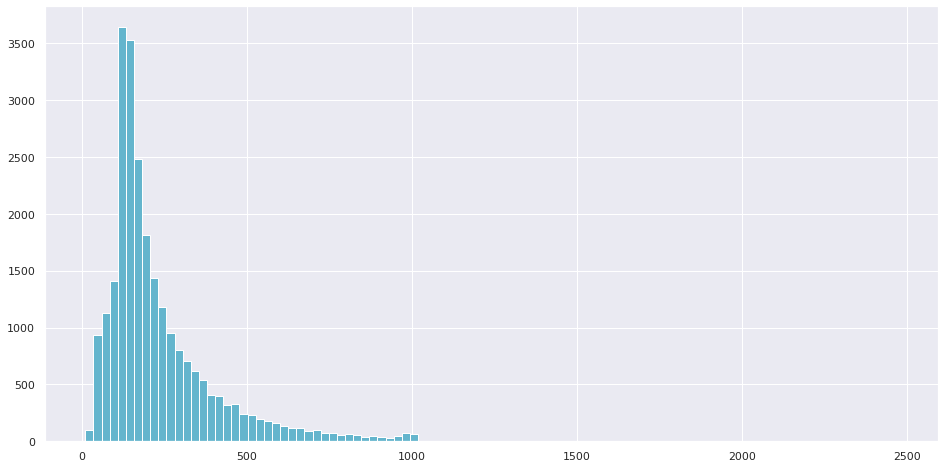

In [35]:
x_train['len'].hist(bins=100, figsize=(16, 8), color='c');

In [36]:
(x_train['len'] > 1000).sum()

51

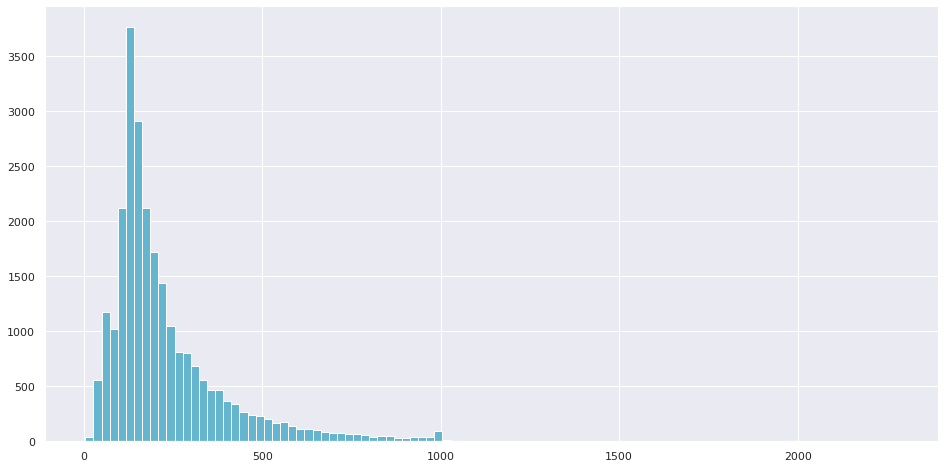

In [37]:
x_test['len'].hist(bins=100, figsize=(16, 8), color='c');

In [38]:
(x_train['len'] > 1000).sum()

51

### Analisando a quantidade de palavras únicas:

In [39]:
x_train['len'] = x_train['text'].apply(lambda x: len(set(x.split())))
x_test['len'] = x_test['text'].apply(lambda x: len(set(x.split())))

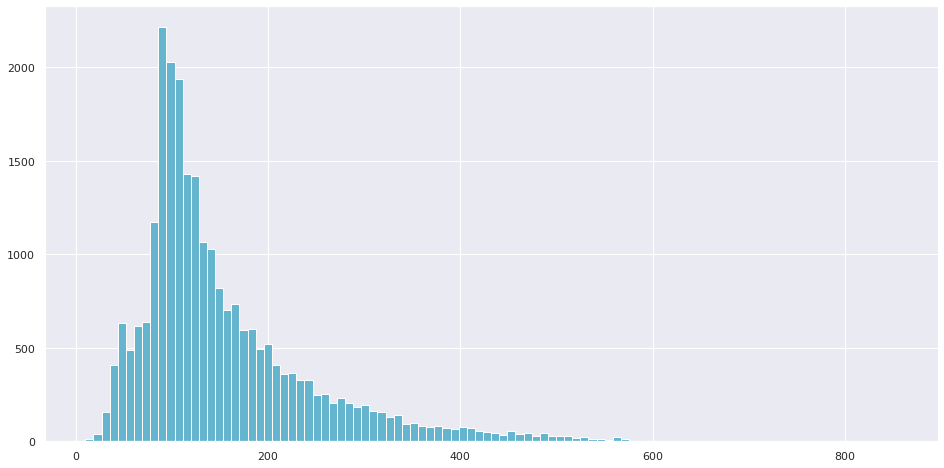

In [40]:
x_train['len'].hist(bins=100, figsize=(16, 8), color='c');

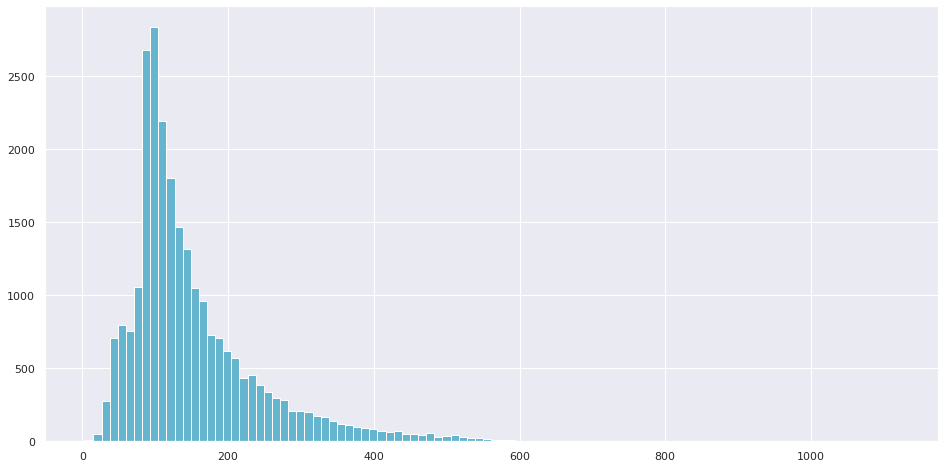

In [41]:
x_test['len'].hist(bins=100, figsize=(16, 8), color='c');

## Plotando as nuvens de palavras:

In [42]:
from wordcloud import WordCloud

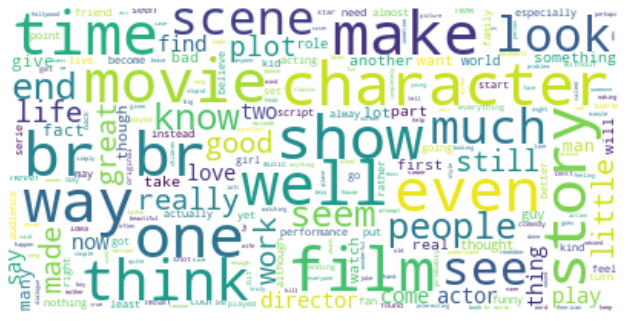

In [43]:
wordcloud = WordCloud(max_font_size=40, max_words=2000, relative_scaling=0, 
                      repeat=False, background_color="white")
wordcloud_geral = wordcloud.generate(' '.join(x_train['text']))

plt.figure(figsize=(11, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

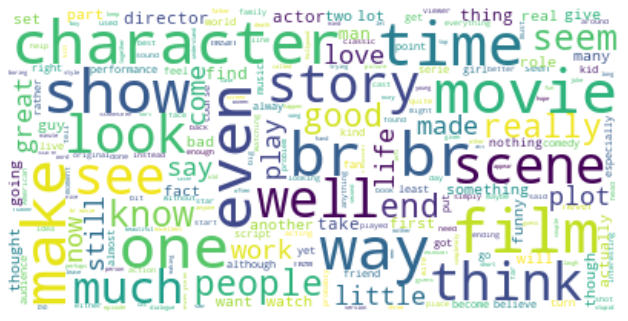

In [44]:
wordcloud = WordCloud(max_font_size=40, max_words=2000, relative_scaling=0, 
                      repeat=False, background_color="white")
wordcloud_geral = wordcloud.generate(' '.join(x_test['text']))

plt.figure(figsize=(11, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Modeling

In [45]:
vectorizer = TfidfVectorizer().fit(x_train['text'])

x_train = vectorizer.transform(x_train['text'])
x_test = vectorizer.transform(x_test['text'])

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.66152
precision: 0.6638926580141474
recall:    0.66152
f1_score:  0.6602905147343638


In [47]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.70208
precision: 0.7020816761462546
recall:    0.70208
f1_score:  0.7020793822318071


In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.83524
precision: 0.8354397073841884
recall:    0.83524
f1_score:  0.8352154734710715


In [49]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.8034
precision: 0.8051888441454191
recall:    0.8034
f1_score:  0.8031114877647324


In [50]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.86096
precision: 0.8614753979844132
recall:    0.86096
f1_score:  0.8609104209075383


In [51]:
from sklearn.svm import SVC

model = SVC().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.8872
precision: 0.8872406051204755
recall:    0.8872
f1_score:  0.8871970429381624


## Feature importance

In [59]:
mapping_features = {}
for i, feat in enumerate(vectorizer.get_feature_names()):
    mapping_features[i] = feat

In [56]:
x_train.shape[1]

74849

In [62]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(x_train, y_train)

In [65]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print(f"{f + 1}. {mapping_features[indices[f]]} ({importances[indices[f]]})")
    if importances[indices[f]] == 0.0:
        break

Feature ranking:
1. bad (0.008950939619606413)
2. worst (0.008767433221522201)
3. great (0.005462978270297582)
4. awful (0.0047734797460717675)
5. and (0.00469852729899916)
6. no (0.004360216764118947)
7. waste (0.0038900663088308096)
8. nothing (0.003837142429745506)
9. best (0.0037540762703214144)
10. just (0.0037384903860177236)
11. worse (0.0034349268082089503)
12. excellent (0.0033358357148888544)
13. boring (0.0032306257952702134)
14. this (0.002956414507822023)
15. poor (0.002933827503793791)
16. even (0.0027758662787418648)
17. movie (0.0027586244173633825)
18. was (0.002747564186138945)
19. is (0.002733844858702863)
20. plot (0.002714126483388336)
21. terrible (0.0027041898352668215)
22. stupid (0.002648096934535441)
23. only (0.002569236233668418)
24. the (0.0025296441306091265)
25. acting (0.0025273145535935305)
26. to (0.0025268634094563363)
27. there (0.00252178516518224)
28. well (0.002512766283793955)
29. supposed (0.0025110900617653087)
30. wonderful (0.0025086056932543

2372. relatively (6.083044348852731e-05)
2373. executed (6.076193949366538e-05)
2374. daniel (6.070035251977549e-05)
2375. discovered (6.0641495179341776e-05)
2376. lighting (6.060513998680635e-05)
2377. round (6.057594723668062e-05)
2378. experiences (6.05741331107658e-05)
2379. sign (6.0504041221789466e-05)
2380. simon (6.0454242724614775e-05)
2381. heavily (6.042515487122616e-05)
2382. realizes (6.04189241701113e-05)
2383. bits (6.0372753627940534e-05)
2384. heroes (6.036403221107208e-05)
2385. deaths (6.036256115069288e-05)
2386. foreign (6.035598934171118e-05)
2387. marry (6.0338573045363945e-05)
2388. matt (6.029878794190492e-05)
2389. connection (6.029515202903451e-05)
2390. hopefully (6.029020119964729e-05)
2391. busy (6.028993946356629e-05)
2392. frame (6.025253020629127e-05)
2393. 12 (6.022750494350587e-05)
2394. stinks (6.0193613758208405e-05)
2395. smoking (6.017639013044191e-05)
2396. accused (6.016522974179724e-05)
2397. steven (6.014889076593048e-05)
2398. ignorant (6.01

4443. distributed (2.53563747641347e-05)
4444. channels (2.5333327301107237e-05)
4445. extended (2.5327219932313084e-05)
4446. olivier (2.5310317764252482e-05)
4447. covers (2.5304403427095394e-05)
4448. gabriel (2.5293850004547606e-05)
4449. historically (2.528424085770975e-05)
4450. host (2.5283800039866744e-05)
4451. advertising (2.5282854468182292e-05)
4452. brutally (2.5276806881308655e-05)
4453. sidney (2.527222303865322e-05)
4454. pedestrian (2.5251914110977585e-05)
4455. officials (2.5242588353297434e-05)
4456. chaos (2.5236688813818467e-05)
4457. meg (2.5235137529784366e-05)
4458. amazon (2.5233205480732378e-05)
4459. pamela (2.5229460080783474e-05)
4460. reel (2.5228124116807987e-05)
4461. healthy (2.5211857726300104e-05)
4462. warriors (2.5196979905077268e-05)
4463. aunt (2.5196376991767438e-05)
4464. couples (2.5193404672379537e-05)
4465. reward (2.51786530018449e-05)
4466. achieved (2.5171037675587273e-05)
4467. ourselves (2.5158085728232376e-05)
4468. 95 (2.51485379830814

6620. happenings (1.4341214400863757e-05)
6621. tourists (1.4329295870486066e-05)
6622. goldsworthy (1.432057842797735e-05)
6623. gung (1.4317451712859558e-05)
6624. gestures (1.4312610758920943e-05)
6625. locals (1.4302731289190473e-05)
6626. medicine (1.430251189387861e-05)
6627. tailor (1.4302445107603435e-05)
6628. mclaglen (1.4294064144425313e-05)
6629. divine (1.429122550110246e-05)
6630. rests (1.4290726867779027e-05)
6631. craft (1.4286235976667423e-05)
6632. downfall (1.4284267406738509e-05)
6633. camping (1.4284015217737143e-05)
6634. jury (1.4281228232466674e-05)
6635. poke (1.427830499189794e-05)
6636. novak (1.427447364140782e-05)
6637. devious (1.4274151612767904e-05)
6638. baron (1.4273616890837777e-05)
6639. overblown (1.4270977748328506e-05)
6640. papers (1.4270823642227684e-05)
6641. auto (1.4268978729064312e-05)
6642. fisher (1.4263104174470278e-05)
6643. capabilities (1.4259408572002863e-05)
6644. factors (1.4257434866409239e-05)
6645. breeze (1.4247479257247667e-05

8848. paste (9.247917524828297e-06)
8849. chew (9.246451923310918e-06)
8850. cohorts (9.245890227236895e-06)
8851. lindsay (9.244330613828157e-06)
8852. assassins (9.243905346527538e-06)
8853. roller (9.242896218774571e-06)
8854. advertisement (9.240554628524588e-06)
8855. hector (9.237573783233718e-06)
8856. allies (9.236980667976162e-06)
8857. reservation (9.23375957650754e-06)
8858. inoffensive (9.231240864555643e-06)
8859. outrageously (9.227009479564526e-06)
8860. nevermind (9.226289110153155e-06)
8861. muslim (9.226162825713596e-06)
8862. hes (9.222352204617077e-06)
8863. masks (9.22150262334612e-06)
8864. reprises (9.221008663230015e-06)
8865. dish (9.220517745096212e-06)
8866. lois (9.220177493103614e-06)
8867. trademark (9.218809363835849e-06)
8868. threatens (9.217400538989618e-06)
8869. peers (9.21605481999059e-06)
8870. lizard (9.215025135294491e-06)
8871. rapists (9.213878408853905e-06)
8872. mare (9.213171149802892e-06)
8873. categories (9.212250509208996e-06)
8874. inbre

10928. patiently (6.729844108647168e-06)
10929. fiend (6.728514396975481e-06)
10930. dives (6.726620196655045e-06)
10931. naming (6.726578729466832e-06)
10932. youngsters (6.725429829386499e-06)
10933. bisexual (6.725164852486061e-06)
10934. coasted (6.7250188558213216e-06)
10935. appliances (6.724044452558464e-06)
10936. nickelodeon (6.723128033033067e-06)
10937. playwright (6.721727220314498e-06)
10938. animate (6.721475397264021e-06)
10939. brendan (6.72033811119587e-06)
10940. midkiff (6.719541450864501e-06)
10941. irritate (6.718083594737792e-06)
10942. candidates (6.717890607417998e-06)
10943. treading (6.716716716639033e-06)
10944. rainer (6.71594721257421e-06)
10945. 42 (6.7149893301788655e-06)
10946. persuasion (6.7145507473594505e-06)
10947. recognizing (6.714297258905699e-06)
10948. lingo (6.712803435090627e-06)
10949. ng (6.709597677083509e-06)
10950. introductions (6.707239757630693e-06)
10951. helper (6.706144936993108e-06)
10952. brightly (6.705939538616047e-06)
10953. u

13041. audacity (5.131689670321107e-06)
13042. simulate (5.131671866856482e-06)
13043. bombay (5.131447771869705e-06)
13044. splits (5.13087176094602e-06)
13045. fitzgerald (5.129585340700086e-06)
13046. normality (5.1295813052106675e-06)
13047. implications (5.129155645780571e-06)
13048. arriving (5.128895782894882e-06)
13049. betray (5.128608252706119e-06)
13050. caligari (5.1284099935521715e-06)
13051. crab (5.12831357944876e-06)
13052. jerky (5.128270252901398e-06)
13053. jeanette (5.126847466049684e-06)
13054. carroll (5.1262788316252496e-06)
13055. priestley (5.125355622401611e-06)
13056. ski (5.1252808900336134e-06)
13057. entertainments (5.1242099749387784e-06)
13058. grandeur (5.123535442394968e-06)
13059. delapidated (5.123297444184166e-06)
13060. osama (5.1229216193023224e-06)
13061. gadar (5.122859698084757e-06)
13062. ancestors (5.122208186529825e-06)
13063. manual (5.122095179455267e-06)
13064. breakers (5.1213169138664125e-06)
13065. luana (5.121031449351668e-06)
13066. 

15115. boogens (4.011027847801623e-06)
15116. differentiate (4.010559762387634e-06)
15117. imperial (4.009335601484263e-06)
15118. brighten (4.009091986478458e-06)
15119. spout (4.008933448811166e-06)
15120. chip (4.00884071822044e-06)
15121. unconsciously (4.0083118429883636e-06)
15122. jms (4.007617918205637e-06)
15123. picasso (4.006622270824225e-06)
15124. trailing (4.006471192375055e-06)
15125. ragnardocks (4.006446309581809e-06)
15126. comfortably (4.006223812260267e-06)
15127. professionalism (4.006000162243117e-06)
15128. fanboy (4.0054965270915065e-06)
15129. grounded (4.004883416910036e-06)
15130. accompaniment (4.00420371074578e-06)
15131. charity (4.0039194288132605e-06)
15132. selleck (4.003816646550923e-06)
15133. trivialized (4.003489588368158e-06)
15134. crossbows (4.0032372647651474e-06)
15135. beverages (4.0017211232265125e-06)
15136. fiercely (4.001702699611686e-06)
15137. filmschool (4.001407680590753e-06)
15138. flabbergasted (4.000259692837931e-06)
15139. reno (3.

16679. terrace (3.407007414782399e-06)
16680. dictionary (3.406895348011504e-06)
16681. praying (3.4057137416416538e-06)
16682. railroaded (3.405317493308372e-06)
16683. benign (3.4043801061571234e-06)
16684. rambeau (3.404219607984171e-06)
16685. patrols (3.40372684467945e-06)
16686. jot (3.4033009590900467e-06)
16687. filipino (3.4030543069953973e-06)
16688. augmented (3.402859142731632e-06)
16689. orthodox (3.401999583951641e-06)
16690. cinematographical (3.401926279067414e-06)
16691. arte (3.4014223066018906e-06)
16692. sens (3.4010824610181406e-06)
16693. biter (3.4005657068752192e-06)
16694. rowdies (3.3999731252861733e-06)
16695. agitated (3.3999654781979296e-06)
16696. declined (3.399302703235037e-06)
16697. uncovers (3.3989358887571047e-06)
16698. billows (3.398229208065471e-06)
16699. repo (3.397971815754525e-06)
16700. antichrist (3.3979509897539096e-06)
16701. finley (3.3976586934059842e-06)
16702. albin (3.396565263397836e-06)
16703. 8o (3.3960404370585065e-06)
16704. flou

18446. potala (2.8595639400934122e-06)
18447. fletcher (2.8595441938907094e-06)
18448. finances (2.8593780076140638e-06)
18449. mata (2.8589233291579154e-06)
18450. impactful (2.858875628058485e-06)
18451. hopeing (2.858842009427184e-06)
18452. rehearsing (2.858753220202155e-06)
18453. videotape (2.8586542208514246e-06)
18454. poorer (2.858213743340841e-06)
18455. prevails (2.858179637948484e-06)
18456. mortgan (2.8581027178476646e-06)
18457. upham (2.8576437809274163e-06)
18458. rows (2.8566706698140405e-06)
18459. ouch (2.8556765384673905e-06)
18460. peering (2.8554956854977656e-06)
18461. ticking (2.855482922433624e-06)
18462. pacte (2.8553695631799704e-06)
18463. lounges (2.8552378709167985e-06)
18464. gon (2.8552020686335663e-06)
18465. alta (2.8551711087470534e-06)
18466. completly (2.8547550952546897e-06)
18467. bathhouse (2.8547199584348758e-06)
18468. meanest (2.854632051454284e-06)
18469. bethlehem (2.854464349130009e-06)
18470. matthews (2.854422404293379e-06)
18471. amuse (

20272. brawl (2.504120043865869e-06)
20273. briefs (2.503928582728365e-06)
20274. lainie (2.503134101637796e-06)
20275. bambaata (2.502965839697419e-06)
20276. deoxys (2.5028972018047284e-06)
20277. nahin (2.502855337841708e-06)
20278. brisson (2.5023805050067905e-06)
20279. schwarzman (2.5023660289567097e-06)
20280. erased (2.5023605919725194e-06)
20281. dodging (2.502237046075064e-06)
20282. incoherently (2.502068849495893e-06)
20283. cheapness (2.5019108257077324e-06)
20284. obligations (2.501598065980955e-06)
20285. truely (2.501566196246631e-06)
20286. jedi (2.501507962975661e-06)
20287. egress (2.501268453421812e-06)
20288. inevitability (2.5011742434016674e-06)
20289. asner (2.5008597290815083e-06)
20290. thoughtfulness (2.5007166558844345e-06)
20291. mangle (2.500356874441637e-06)
20292. hazlehurst (2.500230421235621e-06)
20293. buttafuoco (2.499943384627913e-06)
20294. cashed (2.499766047801675e-06)
20295. uplifter (2.4997207144908094e-06)
20296. jefferson (2.499413333056116e-

22339. waddling (2.0531380881137053e-06)
22340. egotist (2.0529194255713723e-06)
22341. cf (2.0527212781854182e-06)
22342. puff (2.0527169413625655e-06)
22343. monstrously (2.052458323231416e-06)
22344. maslin (2.052449919089317e-06)
22345. jamaican (2.0518084889722776e-06)
22346. farr (2.0514191319384634e-06)
22347. deformity (2.05123675959026e-06)
22348. nanavati (2.051108811987784e-06)
22349. knockoffs (2.050725564693851e-06)
22350. posting (2.050422807953967e-06)
22351. rooker (2.0502205399646443e-06)
22352. actores (2.0497771148353477e-06)
22353. collision (2.0497538590075757e-06)
22354. gregoli (2.049730161865867e-06)
22355. hipper (2.0493604051408396e-06)
22356. traumatisingly (2.0491735667891224e-06)
22357. heartpounding (2.048895268093165e-06)
22358. clément (2.048795355648296e-06)
22359. surreptitiously (2.0485000113254166e-06)
22360. sabella (2.04847177050371e-06)
22361. scat (2.0484612572774913e-06)
22362. fates (2.0484380829596668e-06)
22363. aoi (2.048417851672246e-06)
22

23841. component (1.6135256029046905e-06)
23842. erudite (1.6133934710618616e-06)
23843. jericho (1.6133756270073708e-06)
23844. arrrrrggghhhhhh (1.6133383308101474e-06)
23845. overplays (1.613298812624508e-06)
23846. extant (1.6128909159114206e-06)
23847. dhavan (1.6127093767968991e-06)
23848. littlefield (1.6124770870149559e-06)
23849. jewels (1.6122871516621425e-06)
23850. ska (1.6120739109157648e-06)
23851. palladino (1.61198724680835e-06)
23852. pinch (1.6118211857590295e-06)
23853. outlands (1.611752815256115e-06)
23854. raoul (1.6117068797655313e-06)
23855. hitoto (1.6112844735383776e-06)
23856. heller (1.610555936683142e-06)
23857. toon (1.6104995854188878e-06)
23858. seclusion (1.6103907699316646e-06)
23859. brim (1.6100666697465437e-06)
23860. tormenting (1.6100202712056649e-06)
23861. ninga (1.609991044338627e-06)
23862. rottentomatoes (1.6098731624571253e-06)
23863. longed (1.6088160548711272e-06)
23864. discreetly (1.6085118203667992e-06)
23865. redeemable (1.6082353311538

25469. pandemoniums (1.4716413777471954e-06)
25470. benji (1.4714887999299256e-06)
25471. documentalists (1.4714880936091134e-06)
25472. portable (1.4714830078982527e-06)
25473. novelties (1.4714760709871405e-06)
25474. hrithek (1.4714720741864323e-06)
25475. kents (1.4714717069069437e-06)
25476. naomi (1.4714450814358757e-06)
25477. vidhu (1.4714420614595012e-06)
25478. hanger (1.4713646773140287e-06)
25479. rocll (1.4710965401891837e-06)
25480. alida (1.4709831286011213e-06)
25481. latch (1.4708381706841993e-06)
25482. weinberg (1.4708366451164613e-06)
25483. laundrette (1.4707017815866135e-06)
25484. fee (1.4706026835000375e-06)
25485. cang (1.47058450592078e-06)
25486. fiedler (1.4704062841143135e-06)
25487. secondaries (1.4704037781502603e-06)
25488. reins (1.4703785869423703e-06)
25489. trickery (1.4703093511577282e-06)
25490. environments (1.4702622124444374e-06)
25491. discounting (1.47025233608071e-06)
25492. flockofducks (1.470225041459325e-06)
25493. crucible (1.470185536719

27187. erected (1.3553899371677021e-06)
27188. butterfly (1.3553632607255598e-06)
27189. fraulein (1.3553198102820264e-06)
27190. mesake (1.3551674173309972e-06)
27191. curtin (1.355051326798409e-06)
27192. barb (1.3550141051492775e-06)
27193. dweller (1.354643269931958e-06)
27194. goats (1.35439814980359e-06)
27195. spate (1.3542418479661262e-06)
27196. convulsed (1.3542274949299417e-06)
27197. sorbet (1.3541781952273274e-06)
27198. stargaard (1.3540904354500218e-06)
27199. kgb (1.3539022411883321e-06)
27200. logand (1.3534995216651262e-06)
27201. brims (1.3534639115930604e-06)
27202. boesman (1.3534554919473e-06)
27203. authenic (1.353447536144654e-06)
27204. extravagance (1.3532338059189479e-06)
27205. morisette (1.3531537516836063e-06)
27206. sigmund (1.3529367766160689e-06)
27207. handpuppets (1.3528798937691972e-06)
27208. barefaced (1.352842052629658e-06)
27209. chucked (1.3526007756202942e-06)
27210. ablaze (1.3525737304978548e-06)
27211. bravi (1.3525727588655938e-06)
27212. p

28864. josip (1.2000007680004917e-06)
28865. snuggest (1.2000007680004917e-06)
28866. grooming (1.2000006220803223e-06)
28867. boos (1.2000004915202014e-06)
28868. motorcyclist (1.200000376320118e-06)
28869. gillman (1.2000001920000307e-06)
28870. harking (1.2000001920000305e-06)
28871. alecky (1.2000001228800126e-06)
28872. rosenstrasse (1.2000001228800126e-06)
28873. moovies (1.2000000691200041e-06)
28874. jame (1.2000000307200007e-06)
28875. reda (1.2000000307200007e-06)
28876. heralded (1.2000000307200007e-06)
28877. piedras (1.1999028815912376e-06)
28878. peaces (1.1994506962801991e-06)
28879. rosa (1.1994127550651863e-06)
28880. hof (1.1993477877387715e-06)
28881. kimono (1.199338599379831e-06)
28882. perfume (1.1993102061678723e-06)
28883. flashed (1.1990258988981618e-06)
28884. yorkshire (1.1989414236199018e-06)
28885. justness (1.1988418262091286e-06)
28886. perverts (1.1988059254464832e-06)
28887. publics (1.1981087937531891e-06)
28888. simultaneous (1.1979185153517587e-06)
2

30301. stanwyk (1.0256473337823874e-06)
30302. retellings (1.0256451282215387e-06)
30303. thunderstorm (1.0256436512887733e-06)
30304. jarmusch (1.0256410322051285e-06)
30305. jarringly (1.0249942044160593e-06)
30306. suggestible (1.024944074482973e-06)
30307. torres (1.0248744872274334e-06)
30308. muertos (1.024867829439899e-06)
30309. favours (1.0248504802423324e-06)
30310. bodys (1.0248403792787627e-06)
30311. shambolic (1.0248370210804326e-06)
30312. defilement (1.0247279652697055e-06)
30313. rays (1.0246457116209993e-06)
30314. chicory (1.0245881844325427e-06)
30315. mountaineers (1.0245394340677112e-06)
30316. kindergartener (1.0245315880378314e-06)
30317. noriega (1.024509102373151e-06)
30318. adulthood (1.0244187619513608e-06)
30319. stine (1.0243905552031871e-06)
30320. jbl (1.0243820098222805e-06)
30321. livesy (1.0243671820566735e-06)
30322. soha (1.024345300857752e-06)
30323. wretchedness (1.0243427217095122e-06)
30324. ramo (1.0243412466522168e-06)
30325. doggedly (1.02433

32216. kasdan (5.978216465397219e-07)
32217. jog (5.97002599262596e-07)
32218. stinkpile (5.966056633858136e-07)
32219. goodhearted (5.961192412206523e-07)
32220. grrr (5.939997481154012e-07)
32221. saranden (5.939544813335475e-07)
32222. aspirant (5.939435334882453e-07)
32223. residue (5.939428150500091e-07)
32224. clarifies (5.933805087266845e-07)
32225. longish (5.929443679343548e-07)
32226. pence (5.927614617819241e-07)
32227. pediatrician (5.923417618613168e-07)
32228. festivities (5.908402034398118e-07)
32229. looser (5.901862977501068e-07)
32230. coding (5.892976087298448e-07)
32231. louisville (5.891168830186332e-07)
32232. kanwar (5.89109383561176e-07)
32233. kremhild (5.88671893881768e-07)
32234. hidegarishous (5.885159317477474e-07)
32235. bicycling (5.885114759325502e-07)
32236. scripter (5.884415066177191e-07)
32237. farcelike (5.882432603431752e-07)
32238. scriptural (5.87755948409379e-07)
32239. voiceover (5.87706207107657e-07)
32240. irreverent (5.859299604758386e-07)
3

33862. coonskin (1.2929362520293807e-07)
33863. heaviness (1.2929340592014135e-07)
33864. intelligible (1.2929299631841904e-07)
33865. sportsmen (1.292929822513353e-07)
33866. functioned (1.2929293260282886e-07)
33867. kazakos (1.2929293012040454e-07)
33868. varhola (1.2860772681624438e-07)
33869. vows (1.2859663351159603e-07)
33870. localized (1.2859249716616345e-07)
33871. mold (1.285868746325476e-07)
33872. dory (1.285868746325476e-07)
33873. sculptures (1.2858491167666239e-07)
33874. tautly (1.2857656422798679e-07)
33875. hahahahaha (1.2857479908264086e-07)
33876. debated (1.285725550727263e-07)
33877. sixpence (1.285717577151275e-07)
33878. rangeela (1.2857169517769486e-07)
33879. nastiness (1.2857169517769483e-07)
33880. snip (1.2857144173714342e-07)
33881. farther (1.2842835995453273e-07)
33882. newsgroup (1.283264598672975e-07)
33883. priggish (1.2832328634383615e-07)
33884. delicacies (1.2832092026557265e-07)
33885. glancingly (1.2816444193200512e-07)
33886. warthog (1.2805130

35729. kartiff (8.728187944111708e-09)
35730. socky (8.728187944111708e-09)
35731. donated (8.728050515273938e-09)
35732. ulli (8.7272741236354e-09)
35733. hagan (8.602272153122876e-09)
35734. chieftain (8.563903410238376e-09)
35735. anglade (8.465772362962212e-09)
35736. paralytic (8.465657227794896e-09)
35737. spectactor (8.465647962936399e-09)
35738. firecrackers (8.465608682328847e-09)
35739. infinity (8.205175466937266e-09)
35740. amatuer (8.173832385384235e-09)
35741. bigalow (8.170514800474074e-09)
35742. clarrissa (8.08081971718586e-09)
35743. cautious (8.028495454392805e-09)
35744. forehead (8.027400305383693e-09)
35745. ferdie (8.027118344664394e-09)
35746. basset (8.027092913685618e-09)
35747. inuyasha (8.026934680104914e-09)
35748. browns (8.021364345647317e-09)
35749. thumbnail (8.020694039463526e-09)
35750. apologetic (8.020429767543717e-09)
35751. copulating (8.020260371626413e-09)
35752. monopolist (8.02014949817327e-09)
35753. stingray (8.020093292663067e-09)
35754. th